## Formatting time

earthkit-plots allows you to easily customise plot titles and legends using time-related metadata. This is especially useful for **forecast data**, where multiple timestamps are involved: base time, lead time, and valid time.

This notebook demonstrates how to:
- Format titles with time-related metadata
- Understand special time-related placeholders

Let's start by getting some sample data:

In [1]:
import earthkit as ek

data = ek.data.from_source("url", "https://get.ecmwf.int/repository/test-data/metview/gallery/fc_msl_wg_joachim.grib")
data.ls()

fc_msl_wg_joachim.grib:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,msl,surface,0,20111215,0,0,fc,0,regular_ll
1,ecmf,10fg6,surface,0,20111215,0,0,fc,0,regular_ll
2,ecmf,msl,surface,0,20111215,0,6,fc,0,regular_ll
3,ecmf,10fg6,surface,0,20111215,0,0-6,fc,0,regular_ll
4,ecmf,msl,surface,0,20111215,0,12,fc,0,regular_ll
5,ecmf,10fg6,surface,0,20111215,0,6-12,fc,0,regular_ll
6,ecmf,msl,surface,0,20111215,0,18,fc,0,regular_ll
7,ecmf,10fg6,surface,0,20111215,0,12-18,fc,0,regular_ll
8,ecmf,msl,surface,0,20111215,0,24,fc,0,regular_ll
9,ecmf,10fg6,surface,0,20111215,0,18-24,fc,0,regular_ll


This contains 9 forecast timesteps of:
- msl — mean sea level pressure
- 10fg6 - 10 metre wind gust in the past 6 hours

Let's start by plotting a 10 metre wind gust field. By default, earthkit-plots will:
- Detect field names and times from metadata
- Auto-generate the title, detecting that this is **forecast** data and adjusting the title accordingly

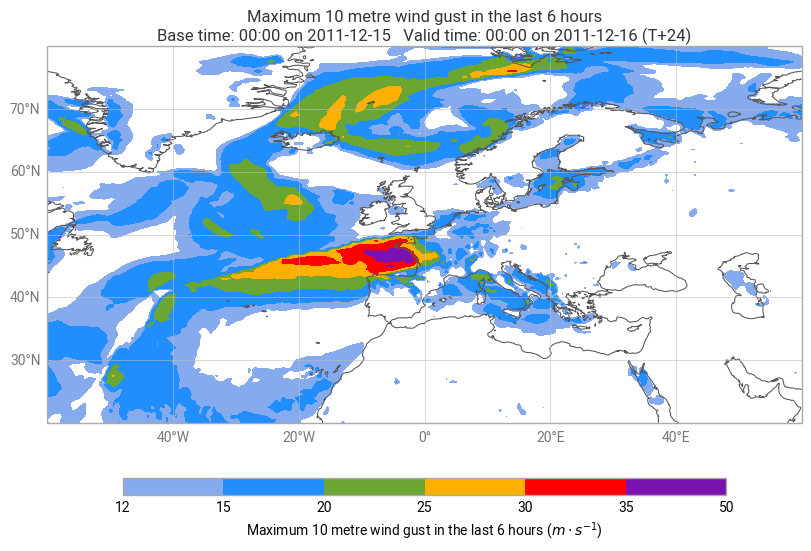

In [2]:
ek.plots.quickplot(data[9]).show()

To customise how time information appears, you can use template strings in the plot title, as we have seen throughout the string formatting examples:

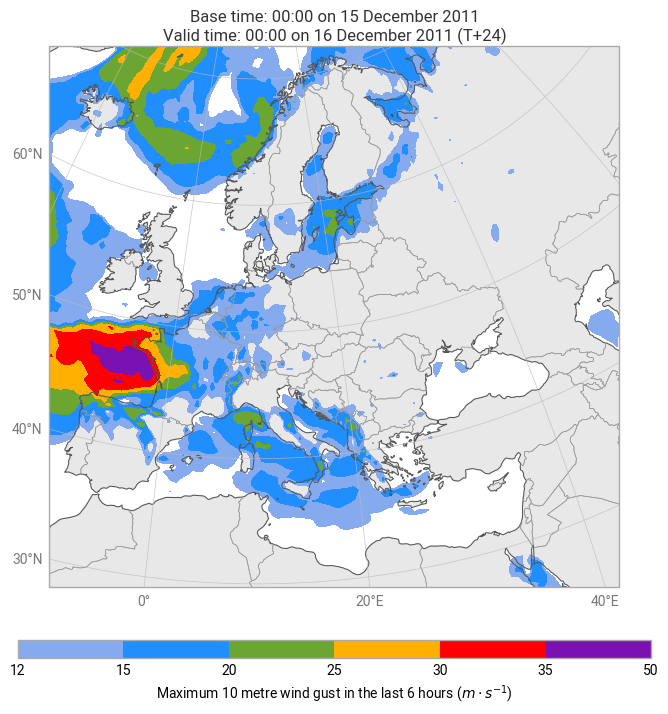

In [3]:
chart = ek.plots.Map(domain="Europe")

chart.quickplot(data[9])

chart.title(
    "Base time: {base_time:%H:%M on %-d %B %Y}\n"
    "Valid time: {valid_time:%H:%M on %-d %B %Y} (T+{lead_time})"
)

chart.legend()

chart.land()
chart.coastlines()
chart.borders()
chart.gridlines()

chart.show()

The special keys to know are the following, which can call be formatted using standard time format strings, as in the example above:
- `{time}` - if your data has a `time` dimension, this will be used - but if you have forecast data, this is the same as `{valid_time}`
- `{base_time}` - if you have forecast data, this is the forecast reference time.
- `{valid_time}` - if you have forecast data, this is the validity time.

There are also two more useful special keys to be aware of:
- `{lead_time}` - if you have forecast data, this is the time (in hours) since the start of the forecast, or the validity time minus the base time.
- `{utc_offset}` - if your data has time zone encoding, this is the number of hours that your timezone is offset from UTC. If your data has no timezone encoding, then UTC will be assumed.